# Методы генерации случайных чисел

## Теоретическая часть

В данном ноутбуке реализованы и проверены четыре метода генерации случаных чисел: метод серединных квадратов, метод серединных произведений, метод перемешивания и линейный конгруэнтный метод.

Случайная последовательность, порождаемая генератором случаных чисел (ГСЧ), должна удовлетворять целому ряду критериев, поэтому любой алгоритм генерации случаных чисел должен быть тщательно проверен.

Осуществляемые проверки бывают двух типов:

* Проверки на равномерность распределения;
* Проверки на статистическую независимость.

### Проверки на равномерность распределения

Проверкой на равномерность распределения будут являться вычисление значения статистических параметров (математическое ожидание и дисперсия), а также проверка по критерию хи-квадрат.

Cтатистических параметры эталонного ГСЧ для провеки его на равномерность распределения:
    
* $m \approx 0.5$
* $D \approx 0.0833$

Критерий хи-квадрат позволяет узнать, насколько созданный реальный ГСЧ близок к эталону ГСЧ. Значение критерия хи-квадрат зависит от числа степеней свободы (размер выборки сгенерированных случайных чисел минус единица). Считается, что генератор случайных чисел удовлетворяет требованию равномерного распределения (т.е. близок к эталону ГСЧ), если критерий хи-квадрат находится в диапазоне между 25% и 50% процентилями $χ^2$-распределения для данного числа степеней свободы.

В этой работе размер всех выборок сгенерированных случайных чисел равен 10000. Для удобства сравнения ниже рассчитано значение критерия хи-квадрат для 50% процентили:

In [1]:
n = 1000000
from scipy.stats import chi2
chi2.ppf(0.5, n - 1)

999998.33333341242

### Проверки на статистическую независимость

Проверки на статистическую независимость не менее важны при оценивании качества работы ГСЧ. Такая проверка обычно влючает в себя анализ частоты появления отдельной цифры и анализ появления серий из одинаковых цифр в последовательности.

Понятно, что теоретическая вероятность $p_i$ выпадения $i$-ой цифры (от 0 до 9) равна 0.1. Другими словами – цифры в случаных числах также должны быть распределены равномерно.

С сериями из одинаковым цифр тоже всё просто. Теоретическая вероятность появления серии длиной в один символ $p_1$ = 1, в два символа $p_2$ = 0.1, в три символа $p_3$ = 0.01, и так далее.

## Реализация

In [2]:
import numpy as np
from collections import Counter
import seaborn as sb
from scipy.stats import chisquare
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_middle_part(num, length):
    '''
    Возвращает число длины length из середины исходного числа num
    '''
    middle_idx = len(str(num)) // 2
    num_as_str = str(num)
    
    left_bound = middle_idx - (length // 2)
    right_bound = middle_idx + (length // 2)
    
    return int(num_as_str[left_bound : right_bound])

In [4]:
def make_random_num(num):
    '''
    Получает на вход число вида 12345 и возвращает 0.12345
    '''
    return float('0.' + str(num))

In [5]:
def exp_to_int(num):
    '''
    Получает число в экспоненциальной форме и возвращает int число без
    первой цифры
    '''
    return int(str(int(num))[1:])

In [6]:
def shift(num, direction):
    '''
    Функция сдвигает число влево (direction == 'l') или
    вправо (direction == 'r') на длину числа / 4
    '''
    num_as_str = str(num)
    count = len(num_as_str) // 4
    if direction == 'l':
        return int(num_as_str[count:] + num_as_str[:count])
    elif direction == 'r':
        return int(num_as_str[-count:] + num_as_str[:-count])

In [7]:
def count_digits(random_list):
    digits = dict()
    for number in random_list:
        number = str(number)[2:]
        for digit in number:
            if digit not in digits:
                digits[digit] = 1
            else:
                digits[digit] += 1
    return digits

In [8]:
def count_sequences(random_list, digit, count):
    n = 0
    for number in random_list:
        number = str(number)[2:]
        for i in range(len(number)):
            if i + count <= len(number):
                curr_slice = number[i : i + count]
                if curr_slice.count(str(digit)) == count:
                    n += 1
    return n

### Метод серединных квадратов

In [9]:
random_list = []

R_prev = 91375092748365913858645307501535
length = len(str(R_prev))

for i in range(n):
    R = get_middle_part(R_prev ** 2, length)
    random_list.append(make_random_num(R))
    R_prev = R

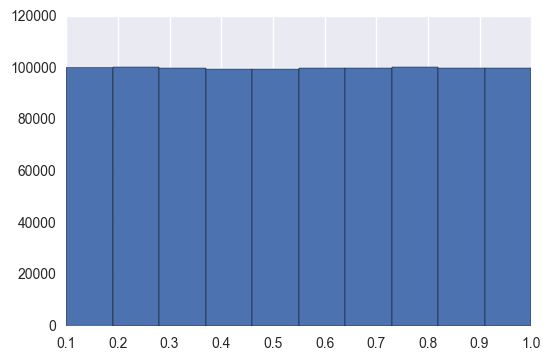

In [10]:
hist = plt.hist(random_list)

In [11]:
freqs = hist[0] / n
true_freqs = np.array([n / 10] * 10)

In [12]:
print('Среднее значение: {}'.format(np.mean(random_list)))
print('Дисперсия: {}'.format(np.std(random_list) ** 2))
print('Критерий хи-квадрат: {}'.format(chisquare(freqs, true_freqs)[0]))

Среднее значение: 0.5500801421193879
Дисперсия: 0.06755724487926176
Критерий хи-квадрат: 999998.000001


In [13]:
print('Проверка на частоту появления цифр:')
count_digits(random_list)

Проверка на частоту появления цифр:


{'0': 1414910,
 '1': 1612383,
 '2': 1627356,
 '3': 1648707,
 '4': 1655843,
 '5': 1656222,
 '6': 1654507,
 '7': 1647900,
 '8': 1628495,
 '9': 1611524}

In [14]:
print('Вероятность встретить серию "66":', count_sequences(random_list, 6, 2) / n)
print('Вероятность встретить серию "666":', count_sequences(random_list, 6, 3) / n)
print('Вероятность встретить серию "6666":', count_sequences(random_list, 6, 4) / n)

Вероятность встретить серию "66": 0.154567
Вероятность встретить серию "666": 0.01413
Вероятность встретить серию "6666": 0.001321


### Метод серединных произведений

In [15]:
random_list = []

R_prev_1 = 91375092748365913858645307501535
R_prev_2 = 97087051240987895344927854167826
length = len(str(R_prev))

for i in range(n):
    R = get_middle_part(R_prev_1 * R_prev_2, length)
    random_list.append(make_random_num(R))
    R_prev_1 = R_prev_2
    R_prev_2 = R

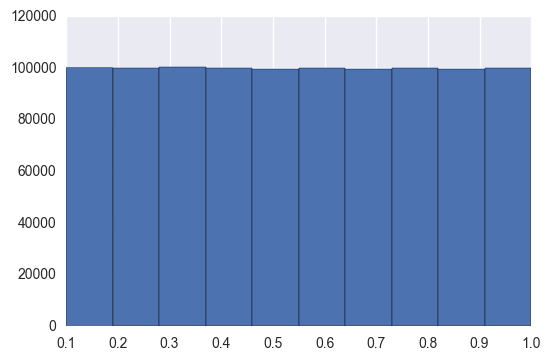

In [16]:
hist = plt.hist(random_list)

In [17]:
freqs = hist[0] / n
true_freqs = np.array([n / 10] * 10)

In [18]:
print('Среднее значение: {}'.format(np.mean(random_list)))
print('Дисперсия: {}'.format(np.std(random_list) ** 2))
print('Критерий хи-квадрат: {}'.format(chisquare(freqs, true_freqs)[0]))

Среднее значение: 0.5497580820797829
Дисперсия: 0.06752619727352392
Критерий хи-квадрат: 999998.0000010001


In [19]:
print('Проверка на частоту появления цифр:')
count_digits(random_list)

Проверка на частоту появления цифр:


{'0': 1414893,
 '1': 1611520,
 '2': 1627351,
 '3': 1649887,
 '4': 1655112,
 '5': 1655144,
 '6': 1655827,
 '7': 1646548,
 '8': 1628197,
 '9': 1612752}

In [20]:
print('Вероятность встретить серию "66":', count_sequences(random_list, 6, 2) / n)
print('Вероятность встретить серию "666":', count_sequences(random_list, 6, 3) / n)
print('Вероятность встретить серию "6666":', count_sequences(random_list, 6, 4) / n)

Вероятность встретить серию "66": 0.155748
Вероятность встретить серию "666": 0.014684
Вероятность встретить серию "6666": 0.001367


### Метод перемешивания

In [21]:
random_list = []

R_prev = 58549257143859061328518594680397
length = len(str(R_prev))

for i in range(n):
    R_1 = shift(R_prev, 'l')
    R_2 = shift(R_prev, 'r')
    R_res = int(str(50 * (R_1 + R_2))[1:length])
    random_list.append(make_random_num(R_res))
    R_prev = R_res

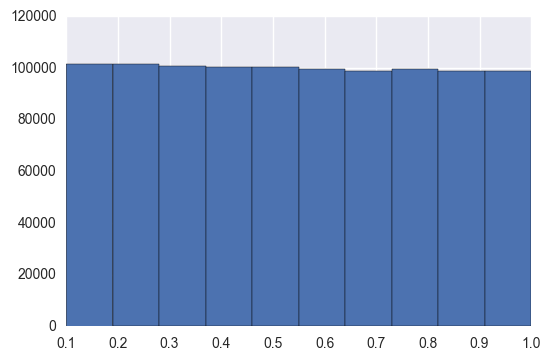

In [22]:
hist = plt.hist(random_list)

In [23]:
freqs = hist[0] / n
true_freqs = np.array([n / 10] * 10)

In [24]:
print('Среднее значение: {}'.format(np.mean(random_list)))
print('Дисперсия: {}'.format(np.std(random_list) ** 2))
print('Критерий хи-квадрат: {}'.format(chisquare(freqs, true_freqs)[0]))

Среднее значение: 0.5475376402639281
Дисперсия: 0.06756290845569693
Критерий хи-квадрат: 999998.0000010001


In [25]:
print('Проверка на частоту появления цифр:')
count_digits(random_list)

Проверка на частоту появления цифр:


{'0': 1416022,
 '1': 1614372,
 '2': 1630308,
 '3': 1649166,
 '4': 1655654,
 '5': 1655715,
 '6': 1657329,
 '7': 1645135,
 '8': 1625918,
 '9': 1610561}

In [26]:
print('Вероятность встретить серию "66":', count_sequences(random_list, 6, 2) / n)
print('Вероятность встретить серию "666":', count_sequences(random_list, 6, 3) / n)
print('Вероятность встретить серию "6666":', count_sequences(random_list, 6, 4) / n)

Вероятность встретить серию "66": 0.155917
Вероятность встретить серию "666": 0.014521
Вероятность встретить серию "6666": 0.001308


### Линейный конгруэнтный метод

In [27]:
random_list = []

k = 1220703125
M = 2e31 - 1
b = 7
R_prev = 94639741963650385107634578359567


for i in range(n):
    R = (k * R_prev + b) % M
    random_list.append(make_random_num(exp_to_int(R)))
    R_prev = R

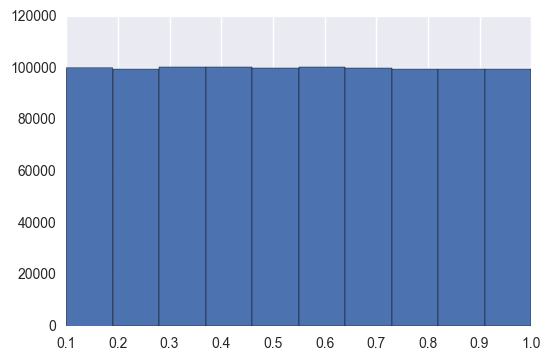

In [28]:
hist = plt.hist(random_list)

In [29]:
freqs = hist[0] / n
true_freqs = np.array([n / 10] * 10)

In [30]:
print('Среднее значение: {}'.format(np.mean(random_list)))
print('Дисперсия: {}'.format(np.std(random_list) ** 2))
print('Критерий хи-квадрат: {}'.format(chisquare(freqs, true_freqs)[0]))

Среднее значение: 0.5497467650242245
Дисперсия: 0.06741044345081976
Критерий хи-квадрат: 999998.0000009999


In [31]:
print('Проверка на частоту появления цифр:')
count_digits(random_list)

Проверка на частоту появления цифр:


{'0': 1413930,
 '1': 1611279,
 '2': 1626600,
 '3': 1648455,
 '4': 1655990,
 '5': 1654616,
 '6': 1656051,
 '7': 1648583,
 '8': 1628770,
 '9': 1612690}

In [32]:
print('Вероятность встретить серию "66":', count_sequences(random_list, 6, 2) / n)
print('Вероятность встретить серию "666":', count_sequences(random_list, 6, 3) / n)
print('Вероятность встретить серию "6666":', count_sequences(random_list, 6, 4) / n)

Вероятность встретить серию "66": 0.155931
Вероятность встретить серию "666": 0.014598
Вероятность встретить серию "6666": 0.001326
